Parameters of the largest circle:
Center: (110, 258)
Radius: 15
Sigma value: 2.0


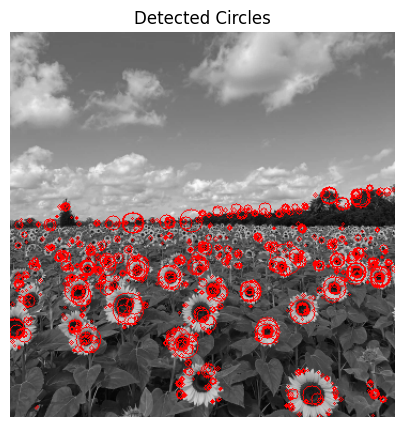

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the sunflower field image
image = cv2.imread('the_berry_farms_sunflower_field.jpeg', cv2.IMREAD_REDUCED_COLOR_4)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


sigma_min = 1.0  # Minimum sigma value for the LoG filter
sigma_max = 2.0  # Maximum sigma value for the LoG filter
sigma_steps = 5  # Number of sigma steps between the min and max values
threshold = 0.35  # Threshold value for the blob mask
sigma_values = np.linspace(sigma_min, sigma_max, sigma_steps) # Sigma values between min and max

# Create an empty list to store detected circles
circles = []

for sigma in sigma_values:
    # Apply LoG (Laplacian of Gaussian) filter
    blurred = cv2.GaussianBlur(gray_image, (0, 0), sigma)
    laplacian = cv2.Laplacian(blurred, cv2.CV_64F)
    abs_laplacian = np.abs(laplacian) # Calculate the absolute Laplacian values
    blob_mask = abs_laplacian > threshold * abs_laplacian.max()  # Create a mask for blobs
    contours, _ = cv2.findContours(blob_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # Find contours around blobs

    for contour in contours: 
        if len(contour) >= 5:
            (x, y), radius = cv2.minEnclosingCircle(contour)
            center = (int(x), int(y))
            radius = int(radius)
            circles.append((center, radius, sigma))

# Sort circles by radius
circles.sort(key=lambda x: -x[1])

# Get the parameters of the largest circle
largest_circle = circles[0]
center, radius, sigma = largest_circle

print("Parameters of the largest circle:")
print(f"Center: {center}")
print(f"Radius: {radius}")
print(f"Sigma value: {sigma}")

# Set the desired line thickness for drawn circles
line_thickness = 1

# Draw all detected circles with the specified line thickness
output_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)
for circle in circles:
    center, radius, _ = circle
    cv2.circle(output_image, center, radius, (0, 0, 255), line_thickness)  # Red color

# Display the grayscale image with detected circles using matplotlib
plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB), cmap='gray')
plt.axis('off')
plt.title('Detected Circles')
plt.show()